# W266 - Headline Project

### Load first training file and explore content

In [1]:
import os
import csv
from NYT_parser import NYTArticle
from utilities import *

train_paths = data_setup.get_paths('train')
article = NYTArticle.from_file(os.path.join('data', train_paths[0][0]))

In [2]:
# how does this differ from the headline??
article.title

'Difficult Lesson in Fund-Raising'

In [3]:
# document ID (filename)
article.docid

'1022224'

In [4]:
# date in a datetime format
article.date

datetime.datetime(1998, 6, 5, 0, 0)

In [5]:
# summary -- few docs seem to have?
article.summary

[]

In [6]:
# dateline -- location (city, state) and pub date
article.dateline

['GREENBURGH, N.Y., June 1']

In [7]:
# headline that ran in the print edition
article.print_hede

['Difficult Lesson in Fund-Raising']

In [8]:
# headline that ran on the website version
article.online_hede

[]

In [9]:
# opening paragraph
article.lede

['At 10 A.M., Paul J. Feiner, the normally irrepressible Town Supervisor here, was mumbling his way through an embarrassing telephone sales pitch.',
 "''Um, hello?'' he said, as if it were a question and he was sorry to ask. ''My name is Paul Feiner? I'm running for Congress on the Democratic ticket? We spoke a few weeks ago and you said you might be willing to contribute to my campaign? You said you were going to talk to your husband?''"]

In [10]:
# topic tags
article.descriptors

['elections', 'finances']

In [11]:
# more extensive tags?
article.general_descriptors

['elections', 'finances', 'politics and government']

In [12]:
# more extensive tags?
article.types_of_material

[]

In [13]:
article.wordcount

'1097'

In [14]:
# section of the print newspaper
article.section

'B'

In [15]:
# body text but also includes subhead, book title data, endbyline, section title -- all kinds of stuff
article.paragraphs

['At 10 A.M., Paul J. Feiner, the normally irrepressible Town Supervisor here, was mumbling his way through an embarrassing telephone sales pitch.',
 "''Um, hello?'' he said, as if it were a question and he was sorry to ask. ''My name is Paul Feiner? I'm running for Congress on the Democratic ticket? We spoke a few weeks ago and you said you might be willing to contribute to my campaign? You said you were going to talk to your husband?''",
 'Mr. Feiner continued until, finally, he was rebuffed.',
 'For six hours a day, nearly every day since he decided in January to run for the 20th Congressional District seat, Mr. Feiner has been on the telephone trying to raise the $600,000 that his advisers say he needs to unseat the Republican incumbent, Representative Benjamin A. Gilman.',
 'Although he is a seasoned local politician, Mr. Feiner said he was surprised to discover that running in a national race was almost entirely about fund-raising. Campaigning in a townwide election, he said, req

### Load all training files and explore training set

In [16]:
# paths = data_setup.get_paths()
    
# explore 50 Headlines
for path in train_paths[:50]:
    article = NYTArticle.from_file(os.path.join('data',path[0]))
    print(article.print_hede)

['Difficult Lesson in Fund-Raising']
['ANSWERS TO QUIZ']
["For Valentine's Day, Dinner for Two"]
["CONSUMER'S WORLD: Guidepost; Players for Video Disks"]
['13 Boats to Risk Dash to New York']
['Equity Sales Set For This Week']
['Abroad at Home;Down the River']
['An Estranged Williams Gets Comfortable at Bat']
['Zenith Reports $11.6 Million Deficit']
['National Briefing | South: Louisiana: Container Law Revoked']
['Meanwhile, Lawmakers Try to End Late Budgets']
["Beyond Sequels: It's On to the Hollywood Hybrid"]
['A Step for Voting Rights']
["'A MOUTH TO FEED'"]
['American Film Technologies reports earnings for Qtr to Sept 30']
['Technology; Taking the Worry Out of Paying With Plastic']
['SYRACUSE THWARTS PROVIDENCE, 90-81']
['Some Genetic Pieces Are Falling Into Place In Breast Cancer Puzzle']
['A Novelty for China: Owning a Home']
['COACHMEN INDUSTRIES INC reports earnings for Qtr to Sept 30']
['Stunning Catch Tips the Balance To Tennessee']
['V-Mail Trouble']
['Alexandra Doan, David 

#### Explore word counts

['1990/07/25/0371438.xml']
['2006/03/23/1748835.xml']
['2006/03/10/1745447.xml']
['2006/03/08/1744996.xml']
15655
0


/home/mark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


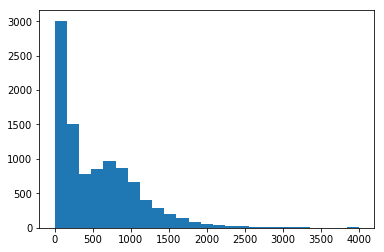

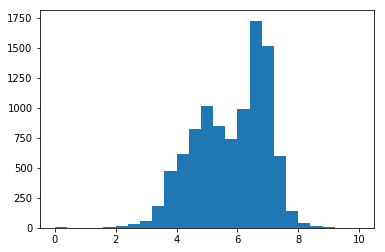

In [17]:
# Sample 10,000 random articles for analysis (entire data set is too large)
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(10)

word_counts = []
for path in random.sample(train_paths, 10000):
    try:
        article = NYTArticle.from_file(os.path.join('data',path[0]))
        word_counts.append(int(article.wordcount))
    except:
        # need to figure out why these are throwing an exception
        print(path)
        word_counts.append(1)

# excluding some outliers from plotting window
plt.hist(word_counts, bins=25, range=(0, 4000))

plt.figure()
plt.hist(np.log(word_counts), bins=25, range=(0, 10))

print(max(word_counts))
print(min(word_counts))

# for a given article length threshold, how many words would we be throwing out?
# print(len(word_counts>1500))